<a href="https://colab.research.google.com/github/majaszymajda/PNoD_wyklad/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import time
from datetime import datetime
import numpy as np
import pandas as pd
import sklearn
import requests

import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

czytanie pliku csv

In [ ]:
def importowanie_danych_csv(nazwa_pliku):
    with open(nazwa_pliku) as plik:
        dane = csv.reader(plik, delimiter=';')
        dane_tablica = []
        try:
            for dana in dane:
                dane_tablica.append(dana)
            print(dane_tablica)
        except csv.Error as error:
            print(f"nie udało się wczytać pliku {nazwa_pliku} błąd: {error.msg} ")
            return None

    return dane_tablica

Pobieranie danych z pliku z mojego githuba

In [5]:

files = [
  "export_dane_pogodowe.csv"
]

def download_and_save_locally(file):
    data = requests.get(f'https://github.com/majaszymajda/PNoD_wyklad/raw/main/{file}')
    if data.status_code != 200:
      print(f"Blad pobierania pliku {file}")

    with open(file, "wb") as f:
      f.write(data.content)

    print(f"Pobrano plik {file}")
    # unzipped_content = gzip.open(io.BytesIO(data))
   # f'df{file}' = pd.read_csv(unzipped_content, delimiter='\t')
 
    # df{file}.head()

for f in files:
    download_and_save_locally(f)
    dane = importowanie_danych_csv(f)

Pobrano plik export_dane_pogodowe.csv
[['Time', 'Temp', 'Pres'], ['00.00', '7.22', '1013.21'], ['00.15', '7.22', '1013.21'], ['00.30', '7.22', '1013.21'], ['00.45', '7.22', '1013.21'], ['01.00', '7.22', '1013.21'], ['01.15', '6.109999999999999', '1012.7'], ['01.30', '5.0', '1012.19'], ['01.45', '5.555', '1012.19'], ['02.00', '6.11', '1012.19'], ['02.15', '6.11', '1012.19'], ['02.30', '6.11', '1012.19'], ['02.45', '6.11', '1012.19'], ['03.00', '6.11', '1012.19'], ['03.15', '5.555', '1012.19'], ['03.30', '5.0', '1012.19'], ['03.45', '5.0', '1011.85'], ['04.00', '5.0', '1011.51'], ['04.15', '4.445', '1011.51'], ['04.30', '3.89', '1011.51'], ['04.45', '3.335', '1011.51'], ['05.00', '2.78', '1011.51'], ['05.15', '3.335', '1011.51'], ['05.30', '3.89', '1011.51'], ['05.45', '3.89', '1011.51'], ['06.00', '3.89', '1011.51'], ['06.15', '3.335', '1011.51'], ['06.30', '2.78', '1011.51'], ['06.45', '3.335', '1011.51'], ['07.00', '3.89', '1011.51'], ['07.15', '4.445', '1011.51'], ['07.30', '5.0', '1

Podział danych na treningowe i testowe

In [20]:
wilgoc = [] # cisnienie
temp = [] # temeperatura
czas = [] # czas
for i in range(1, 50):
  wilgoc.append(float(dane[i][2]))
  temp.append(float(dane[i][1]))
  czas.append(float(dane[i][0]))


In [27]:
x = pd.DataFrame(czas)
y = pd.DataFrame(temp)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [17]:
print(x_test)
print(y_test)

        0
29   7.15
4    1.00
26   6.30
30   7.30
32   8.00
37   9.15
34   8.30
40  10.00
7    1.45
10   2.30
         0
29   4.445
4    7.220
26   2.780
30   5.000
32   7.220
37  11.945
34   8.890
40  13.890
7    5.555
10   6.110


Współczynnik regesji: 
 [[0.98750365]]
średni błąd kwadratowy: 11.55
współczynnik determinacji: -0.09


KeyError: ignored

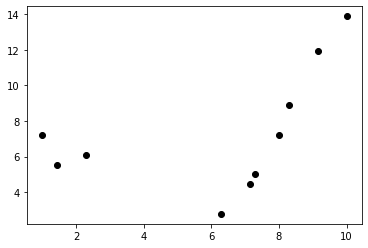

In [31]:

regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

# predykcja dla danych testowych
y_pred = regr.predict(x_test)

# współczynnik regresji
print('Współczynnik regesji: \n', regr.coef_)
# średni bład kwadratowyy
print('średni błąd kwadratowy: %.2f'
      % mean_squared_error(y_test, y_pred))
# współczynnik determinacji 
print('współczynnik determinacji: %.2f'
      % r2_score(y_test, y_pred))



# wykresy
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel("czas")
plt.ylabel("temperatura")
plt.grid(True)

plt.xticks(())
plt.yticks(())

plt.show()